Just a file to try out a few things and to create some of the needed plots

In [1]:
import pandas as pd  # Import needed modules
import numpy as np
from scipy.signal import find_peaks, argrelextrema

data = pd.read_csv("data_bll.csv", sep=";")  # Load the sensor data and process it for usability
print(data)
data["time"] = pd.to_datetime(data["time"], format="%d.%m.%Y-%H:%M:%S")  # Make time to type time

keys = list(data.keys())  # Remove missing data rows
keys.remove("time")
for key in keys:
    data[key] = pd.to_numeric(data[key], errors="coerce")
data = data.dropna()
data = data.reset_index(drop=True)  # regenerate indices after deleting rows
vent = pd.read_csv("vent.csv", sep=";", index_col=0)
vent["time"] = pd.to_datetime(vent["time"], format="%Y-%m-%d %H:%M:%S")  # Make time to type time

dush = pd.read_csv("dush.csv", sep=";", index_col=0)
dush["time"] = pd.to_datetime(dush["time"], format="%Y-%m-%d %H:%M:%S")  # Make time to type time


       Unnamed: 0                 time temperature_bathroom_middle  \
0               0  30.11.2021-20:40:00                        18.3   
1               1  30.11.2021-20:45:00                        18.3   
2               2  30.11.2021-20:50:00                        18.3   
3               3  30.11.2021-20:55:00                        18.4   
4               4  30.11.2021-21:00:00                        18.4   
...           ...                  ...                         ...   
43145       43145  06.05.2022-07:55:00                        19.3   
43146       43146  06.05.2022-08:00:00                        19.3   
43147       43147  06.05.2022-08:05:00                        19.3   
43148       43148  06.05.2022-08:05:46                        19.3   
43149       43149  06.05.2022-08:10:00                        19.3   

      humidity_bathroom_middle temperature_bathoroom_upstairs  \
0                           57                           21.5   
1                           5

KeyError: 'time'

In [2]:
data

,Unnamed: 0,time,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside
0,0,2021-11-30 20:40:00,18.3,57.0,21.5,47.0,6.0,85.0
1,1,2021-11-30 20:45:00,18.3,57.0,21.5,47.0,6.0,85.0
2,2,2021-11-30 20:50:00,18.3,57.0,21.5,47.0,6.0,85.0
3,3,2021-11-30 20:55:00,18.4,58.0,21.3,47.0,6.0,85.0
4,4,2021-11-30 21:00:00,18.4,58.0,21.3,47.0,6.0,86.0
...,...,...,...,...,...,...,...,...
12518,38559,2022-04-23 11:30:00,19.7,44.0,21.6,53.0,14.0,58.0
12519,38560,2022-04-23 11:35:00,18.7,53.0,21.6,53.0,14.0,58.0
12520,38561,2022-04-23 11:40:00,19.1,45.0,21.6,53.0,14.0,58.0
12521,38562,2022-04-23 11:45:00,18.6,47.0,21.6,53.0,14.0,58.0


In [9]:
vent["time"].max() # An little overview

Timestamp('2022-02-07 08:45:00')

In [3]:
data.describe()  # statistically relevant values

,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside
count,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000,5990.000000
mean,18.249716,64.952588,20.922204,56.661603,6.887145,90.469115
std,2.222327,8.978244,1.594511,4.953399,3.535610,6.260043
min,9.000000,45.000000,16.700000,45.000000,-1.000000,66.000000
25%,17.000000,59.000000,20.300000,53.000000,4.000000,87.000000
50%,18.600000,65.000000,21.500000,57.000000,6.000000,92.000000
75%,19.900000,69.000000,22.000000,60.000000,10.000000,95.000000
max,22.300000,97.000000,24.200000,74.000000,15.000000,99.000000


In [4]:
diff_from_avg=data.temperature_bathroom_middle - data.temperature_bathroom_middle.mean()
data = data.assign(temp_diff_mean=diff_from_avg)

diff_from_avg=data.humidity_bathroom_middle - data.temperature_bathroom_middle.mean()
data = data.assign(humi_diff_mean=diff_from_avg)

<AxesSubplot:xlabel='time'>

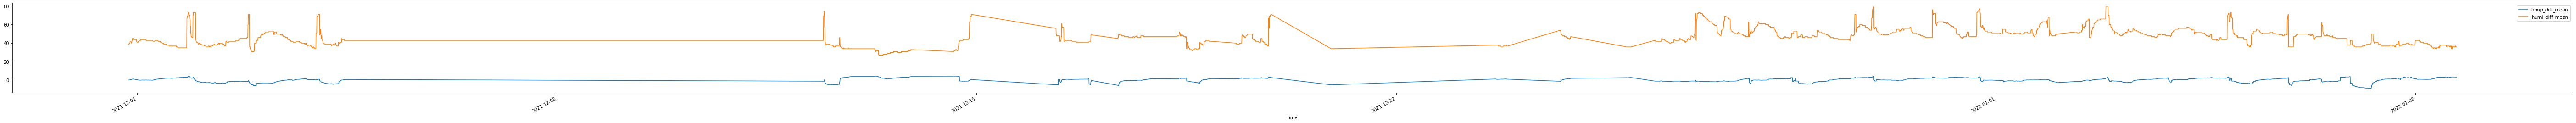

In [5]:
data[["time", "temp_diff_mean", "humi_diff_mean"]].plot(x="time", figsize=(100,4))# Plotting the data

In [6]:
data["derivation_humidity_mid"] = np.gradient(data["humidity_bathroom_middle"], 5)

<AxesSubplot:xlabel='time'>

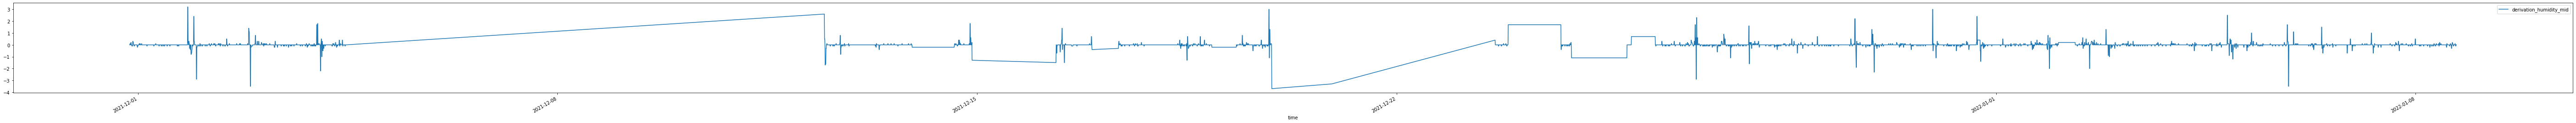

In [7]:
data[["derivation_humidity_mid", "time"]].plot(x="time", figsize=(100,4))

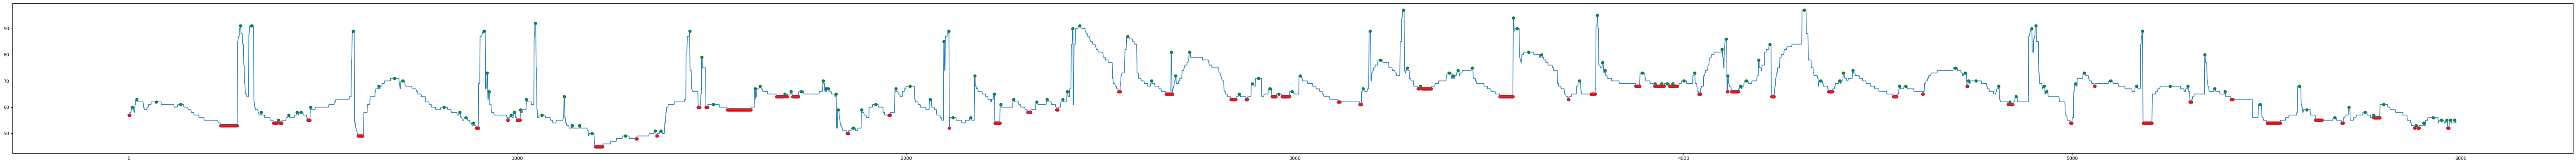

,humidity_peak,temp_out,humi_out,humidity_end_vent,vent_time,peak_start,dush_time,avg_derivate_humi_vent_data
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,79.555556,8.555556,91.333333,61.666667,356.031746,62.206349,258.571429,-0.268344
std,8.669148,3.401981,6.016107,5.847525,248.956141,5.427406,189.624903,0.686158
min,70.000000,3.000000,69.000000,45.000000,15.000000,49.000000,10.000000,-3.700000
25%,72.000000,6.000000,89.500000,57.500000,150.000000,60.500000,107.500000,-0.121435
50%,77.000000,8.000000,93.000000,64.000000,345.000000,64.000000,225.000000,-0.050000
75%,89.000000,11.000000,95.000000,66.000000,515.000000,66.000000,382.500000,-0.028576
max,97.000000,15.000000,98.000000,68.000000,1055.000000,68.000000,755.000000,-0.009286


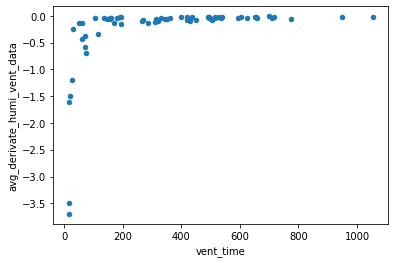

In [16]:
# Here i try to look wheter one can see the dush events purely from the sensor data

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 6), dpi=80)

n = 50  # number of points to be checked before and after

# Find local peaks
data['min'] = data.iloc[argrelextrema(data.humidity_bathroom_middle.values, np.less_equal, order = n)[0]]['humidity_bathroom_middle']
data['max'] = data.iloc[find_peaks(data['humidity_bathroom_middle'])[0]]['humidity_bathroom_middle']

# Plot results

plt.scatter(data.index, data['min'], c='r')
plt.scatter(data.index, data['max'], c='g')
plt.plot(data.index, data['humidity_bathroom_middle'])
plt.show()

processed = []


for i in range(len(data["max"])):
    if  not data["max"].isnull()[i]:
        if data["max"][i] >= 70:
            row = {"humidity_peak": data["max"][i], "temp_out":data["temperature_outside"][i], "humi_out": data["humidity_outside"][i]}
            for j in range(i, len(data["min"])):
                if  not data["min"].isnull()[j]:
                    row["humidity_end_vent"] = data["min"][j]
                    row["humi_vent_data"] = list(data["humidity_bathroom_middle"][i:j+1])
                    row["vent_time"] = len(row["humi_vent_data"])*5
                    break
            for j in range(i, 0, -1):  # Better idea?
                if  not data["min"].isnull()[j]:
                    row["peak_start"] = data["min"][j]
                    row["humi_dush_data"] = list(data["humidity_bathroom_middle"][j:i+1])
                    row["dush_time"] = len(row["humi_dush_data"])*5
                    break
            row["avg_derivate_humi_vent_data"] = np.gradient(row["humi_vent_data"], 5).mean()
            processed.append(row)
processed = pd.DataFrame(processed)
processed[["vent_time", "avg_derivate_humi_vent_data"]].plot.scatter(x="vent_time",y="avg_derivate_humi_vent_data")
processed.describe()


<AxesSubplot:xlabel='index', ylabel='avg_derivate_humi_vent_data'>

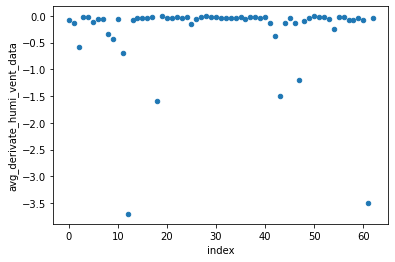

In [9]:
processed["index"] = processed.index.values
processed[["avg_derivate_humi_vent_data", "index"]].plot.scatter(x="index",y="avg_derivate_humi_vent_data")

/home/jonathan/.local/lib/python3.10/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='humidity_bathroom_middle', ylabel='humidity_outside'>

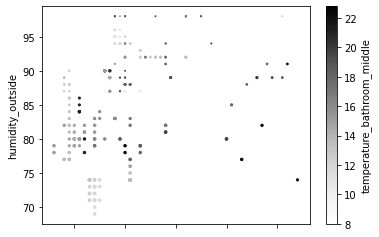

In [4]:
# No overall correlation to the weather outside (not surprising since the bath is being heated)
vent[["temperature_bathroom_middle", "humidity_bathroom_middle", "temperature_outside", "humidity_outside"]].plot.scatter(x="humidity_bathroom_middle", y="humidity_outside", c="temperature_bathroom_middle", s="temperature_outside")

<AxesSubplot:xlabel='temperature_bathroom_middle', ylabel='temperature_outside'>

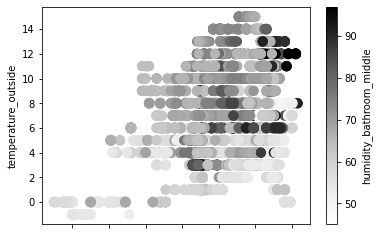

In [13]:
data[["temperature_bathroom_middle", "humidity_bathroom_middle", "temperature_outside", "humidity_outside"]].plot.scatter(c="humidity_bathroom_middle", s="humidity_outside", x="temperature_bathroom_middle", y="temperature_outside")

<AxesSubplot:xlabel='temperature_outside', ylabel='humidity_bathroom_middle'>

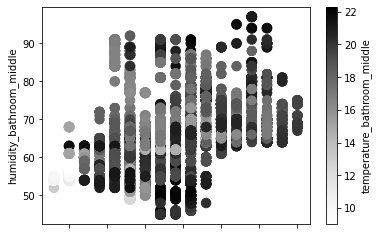

In [14]:
data[["temperature_bathroom_middle", "humidity_bathroom_middle", "temperature_outside", "humidity_outside"]].plot.scatter(y="humidity_bathroom_middle", s="humidity_outside", c="temperature_bathroom_middle", x="temperature_outside")

<AxesSubplot:xlabel='humidity_outside', ylabel='humidity_bathroom_middle'>

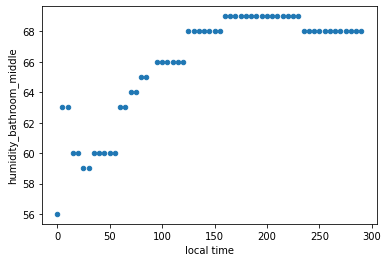

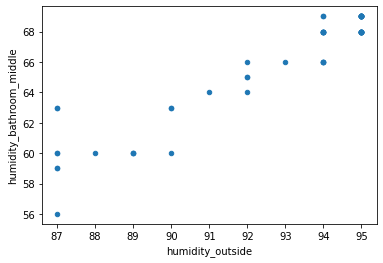

In [5]:
vent[vent["Id"]==10].plot.scatter(y="humidity_bathroom_middle", x="local time")#, c="Id", colormap="viridis")

vent[vent["Id"]==10].plot.scatter(y="humidity_bathroom_middle", x="humidity_outside")#, c="Id", colormap="viridis")

<AxesSubplot:xlabel='local time', ylabel='humidity_bathroom_middle'>

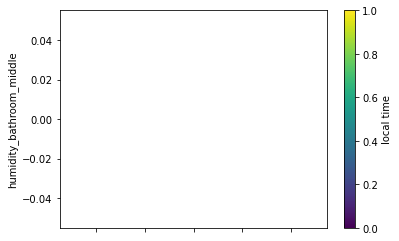

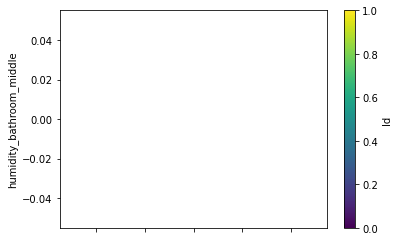

In [6]:
open2 = vent[vent["Config"] == "2"]
open2.plot.scatter(y="humidity_bathroom_middle", x="humidity_outside", c="local time", colormap="viridis")
open2.plot.scatter(y="humidity_bathroom_middle", x="local time", c="Id", colormap="viridis")

<AxesSubplot:title={'center':'1x offen'}, xlabel='local time', ylabel='humidity_bathroom_middle'>

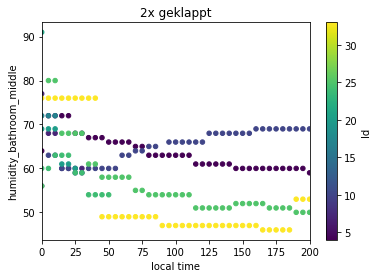

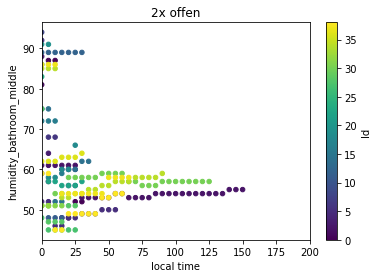

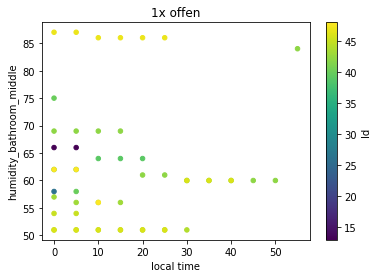

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
vent[vent["Config"]==4].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", xlim=(0,200), ax = ax, title="2x geklappt")
fig, ax = plt.subplots()
vent[vent["Config"]==2].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", xlim=(0,200), ax = ax, title="2x offen")
fig, ax = plt.subplots()
vent[vent["Config"]==1].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", ax = ax, title="1x offen")
#fig, ax = plt.subplots()
#vent[vent["Config"]==3].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", ax = ax, title="1x geklappt")

<AxesSubplot:xlabel='humidity_outside', ylabel='local time'>

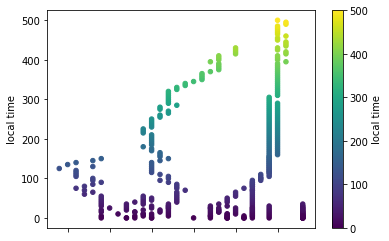

In [24]:
vent[["humidity_outside", "humidity_bathroom_middle", "local time"]].plot.scatter(x = "humidity_outside", y="local time", c="local time", colormap="viridis")

<AxesSubplot:xlabel='time'>

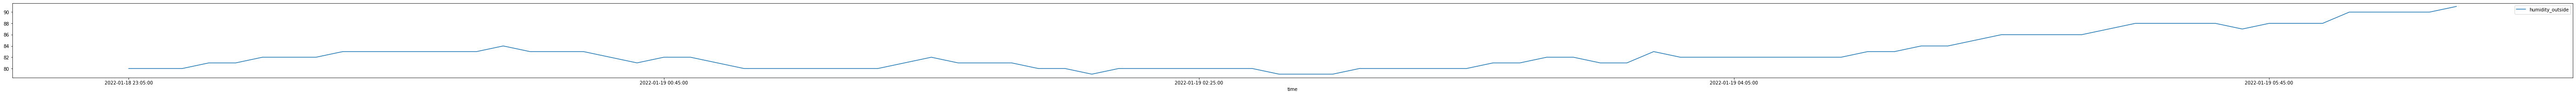

In [10]:
vent[["time", "humidity_outside"]].plot(x="time", figsize=(100,3))

In [15]:
dush[["room"=="up"]].plot.scatter(x = "local time", y="humidity_bathroom_middle", c="Id", colormap="viridis")

ValueError: Item wrong length 1 instead of 156.

In [17]:
vent.corr("spearman") #humidity-in-out # time-humidity

,Unnamed: 0,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside,Id,Config,local time,Unnamed: 0.1,Unnamed: 0.1.1
Unnamed: 0,1.000000,-0.097681,-0.361278,-0.241832,0.130027,-0.082220,-0.072775,0.498292,0.209964,0.194651,1.000000,1.000000
temperature_bathroom_middle,-0.097681,1.000000,0.232557,0.352404,0.050344,-0.090739,-0.061095,0.253195,-0.118990,-0.455317,0.082579,0.082579
humidity_bathroom_middle,-0.361278,0.232557,1.000000,0.133245,-0.435600,-0.492186,0.529866,-0.244897,-0.024531,-0.298724,-0.373066,-0.373066
temperature_bathoroom_upstairs,-0.241832,0.352404,0.133245,1.000000,-0.024343,-0.215147,-0.118885,-0.042158,-0.070718,-0.197565,-0.175741,-0.175741
humidity_bathroom_upstairs,0.130027,0.050344,-0.435600,-0.024343,1.000000,0.602922,-0.509406,0.236303,0.252775,0.213028,0.223871,0.223871
temperature_outside,-0.082220,-0.090739,-0.492186,-0.215147,0.602922,1.000000,-0.864893,0.046630,-0.239629,-0.182675,-0.063814,-0.063814
humidity_outside,-0.072775,-0.061095,0.529866,-0.118885,-0.509406,-0.864893,1.000000,-0.155606,0.149867,0.152196,-0.089660,-0.089660
Id,0.498292,0.253195,-0.244897,-0.042158,0.236303,0.046630,-0.155606,1.000000,-0.334160,-0.196745,0.992302,0.992302
Config,0.209964,-0.118990,-0.024531,-0.070718,0.252775,-0.239629,0.149867,-0.334160,1.000000,0.652725,-0.084698,-0.084698
local time,0.194651,-0.455317,-0.298724,-0.197565,0.213028,-0.182675,0.152196,-0.196745,0.652725,1.000000,0.036349,0.036349


<AxesSubplot:xlabel='local time'>

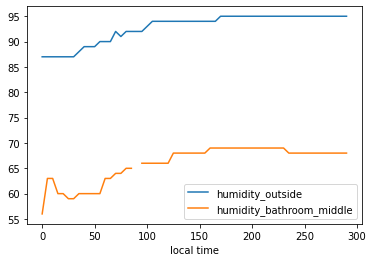

In [6]:
vent[vent["Id"]==10][["humidity_outside", "humidity_bathroom_middle", "local time"]].plot(x="local time")#, c="Id", colormap="viridis")

In [11]:
vent.corr(method="spearman")

,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside,Id,Config,local time,absolute,absolute_outside
temperature_bathroom_middle,1.000000,0.232557,0.352404,0.050344,-0.090739,-0.061095,0.253195,-0.118990,-0.455317,0.898172,-0.102045
humidity_bathroom_middle,0.232557,1.000000,0.133245,-0.435600,-0.492186,0.529866,-0.244897,-0.024531,-0.298724,0.516227,-0.362619
temperature_bathoroom_upstairs,0.352404,0.133245,1.000000,-0.024343,-0.215147,-0.118885,-0.042158,-0.070718,-0.197565,0.286672,-0.351649
humidity_bathroom_upstairs,0.050344,-0.435600,-0.024343,1.000000,0.602922,-0.509406,0.236303,0.252775,0.213028,0.004115,0.558671
temperature_outside,-0.090739,-0.492186,-0.215147,0.602922,1.000000,-0.864893,0.046630,-0.239629,-0.182675,-0.202984,0.924852
humidity_outside,-0.061095,0.529866,-0.118885,-0.509406,-0.864893,1.000000,-0.155606,0.149867,0.152196,0.172482,-0.651169
Id,0.253195,-0.244897,-0.042158,0.236303,0.046630,-0.155606,1.000000,-0.334160,-0.196745,0.140509,-0.010385
Config,-0.118990,-0.024531,-0.070718,0.252775,-0.239629,0.149867,-0.334160,1.000000,0.652725,-0.100817,-0.222345
local time,-0.455317,-0.298724,-0.197565,0.213028,-0.182675,0.152196,-0.196745,0.652725,1.000000,-0.463734,-0.201783
absolute,0.898172,0.516227,0.286672,0.004115,-0.202984,0.172482,0.140509,-0.100817,-0.463734,1.000000,-0.117379


<AxesSubplot:>

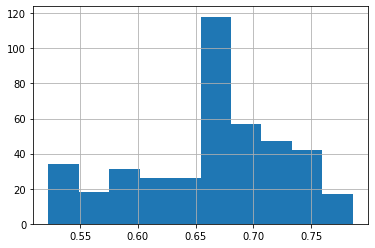

In [14]:
vent["absolute_outside"].hist()

<AxesSubplot:>

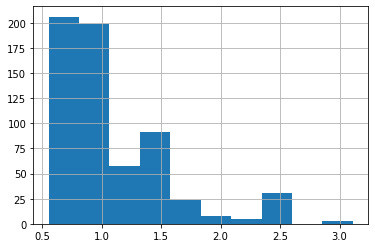

In [52]:
vent["absolute"].hist()

In [16]:
vent[(vent["Config"]==2) & (vent["absolute_outside"] > 0.65) & (vent["absolute_outside"] < 0.7)]

,time,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside,Id,Config,local time,room,absolute,absolute_outside
57,2022-01-08 16:50:00,22.8,87.0,22.0,50.0,4.0,82.0,0,2,5,mid,2.457673,0.667472
58,2022-01-08 16:55:00,22.8,87.0,22.0,50.0,4.0,82.0,0,2,10,mid,2.457673,0.667472
59,2022-01-08 17:00:00,15.3,48.0,22.0,50.0,4.0,82.0,0,2,15,mid,0.841621,0.667472
60,2022-01-08 17:05:00,15.3,48.0,22.0,50.0,4.0,82.0,0,2,20,mid,0.841621,0.667472
61,2022-01-08 17:10:00,12.9,52.0,22.0,50.0,4.0,82.0,0,2,25,mid,0.778578,0.667472
62,2022-01-08 17:15:00,12.9,52.0,21.9,50.0,4.0,82.0,0,2,30,mid,0.778578,0.667472
90,2022-01-09 13:45:00,11.7,54.0,21.8,56.0,7.0,69.0,2,2,125,mid,0.746398,0.692733
96,2022-01-09 21:40:00,18.3,88.0,19.2,62.0,3.0,91.0,3,2,0,mid,1.872793,0.690009
97,2022-01-09 21:45:00,16.9,64.0,19.2,62.0,3.0,92.0,3,2,5,mid,1.244922,0.697591
211,2022-01-10 21:15:00,22.5,92.0,20.6,47.0,3.0,91.0,6,2,0,mid,2.550994,0.690009


In [4]:
subset = vent[(vent["Id"] == 0) | (vent["Id"] == 2) | (vent["Id"] == 3) | (vent["Id"] == 6)][["local time", "absolute", "absolute_outside"]]

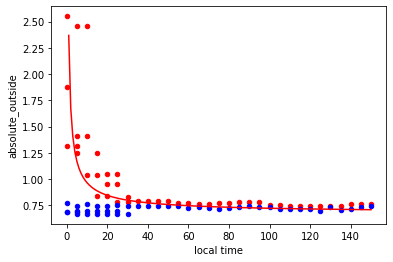

In [5]:
import matplotlib.pyplot as plt
import numpy as np
ax1 = subset.plot(kind='scatter', x='local time', y='absolute', color='r')
subset.plot(kind='scatter', x='local time', y='absolute_outside', color='b', ax=ax1)   



# 100 linearly spaced numbers
x = np.linspace(1,150,150)

# the function, which is y = x^2 here
y = 1.7*1/(x**0.76+0.001) +0.67

# setting the axes at the centre
# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()


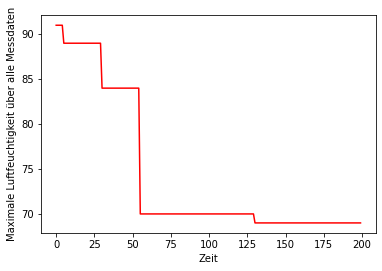

In [25]:
import matplotlib.pyplot as plt


y = []
x = []
for i in range(200):
    y.append(max(data[data["local time"] > i]["humidity_bathroom_middle"]))
    x.append(i)

# setting the axes at the centre
# plot the function
plt.plot(x,y, 'r')
plt.xlabel("Zeit")
plt.ylabel("Maximale Luftfeuchtigkeit über alle Messdaten")

# show the plot
plt.show()


$\partial$

In [88]:
np.unique(vent[(vent["absolute_outside"] > 0.65) & (vent["absolute_outside"] < 0.7)&(vent["absolute"] < 8)&(vent["absolute"] > 0)]["Id"])

array([ 0,  2,  3,  4,  6, 20, 21, 25, 41, 42, 44])

In [73]:
subset = vent[(vent["Id"] == 0) | (vent["Id"] == 4) | (vent["Id"] == 25)][["local time", "absolute", "Config"]]

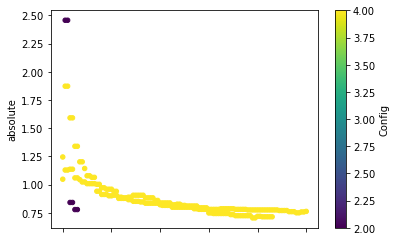

In [74]:
ax1 = subset.plot(kind='scatter', x='local time', y='absolute', c="Config", colormap="viridis")


In [1]:
 def f(c, 𝛼, L_in0, L_out0, t):
    return (L_in0-L_out0)*(c/(t+c))**𝛼 + L_out0

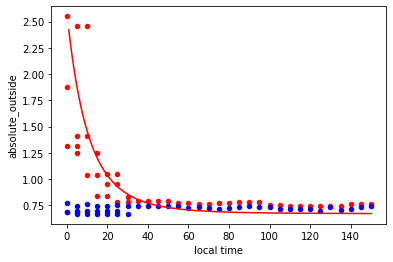

In [42]:
import matplotlib.pyplot as plt
import numpy as np
ax1 = subset.plot(kind='scatter', x='local time', y='absolute', color='r')
subset.plot(kind='scatter', x='local time', y='absolute_outside', color='b', ax=ax1)   



# 100 linearly spaced numbers
x = np.linspace(1,150,150)

# the function, which is y = x^2 here
y = f(60.17071922,  5.79129464, 2.6, 0.67, x)

# setting the axes at the centre
# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()


In [3]:
data = pd.read_csv("vent.csv", sep=";")

In [14]:
max(data[data["local time"] >= 200]["humidity_bathroom_middle"])

69.0

In [ ]:
data.scatter.plot

<AxesSubplot:xlabel='local time', ylabel='humidity_bathroom_middle'>

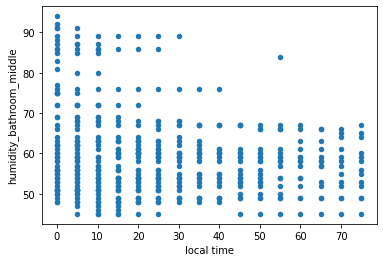

In [9]:
data[data["local time"] < 80].plot.scatter(x="local time", y="humidity_bathroom_middle")